<a href="https://colab.research.google.com/github/IlkerCTL/EE-608/blob/main/ee628_h10_part1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Streaming output truncated to the last 5000 lines.
Image 5000: 0.22507
Image 5001: 0.22919
Image 5002: 0.22553
Image 5003: 0.22909
Image 5004: 0.22870
Image 5005: 0.23589
Image 5006: 0.22516
Image 5007: 0.22538
Image 5008: 0.22750
Image 5009: 0.22687
Image 5010: 0.23216
Image 5011: 0.22716
Image 5012: 0.22654
Image 5013: 0.23604
Image 5014: 0.23612
Image 5015: 0.22655
Image 5016: 0.22279
Image 5017: 0.22596
Image 5018: 0.22978
Image 5019: 0.22807
Image 5020: 0.22759
Image 5021: 0.22815
Image 5022: 0.22902
Image 5023: 0.22811
Image 5024: 0.22566
Image 5025: 0.23582
Image 5026: 0.22702
Image 5027: 0.23179
Image 5028: 0.22617
Image 5029: 0.22646
Image 5030: 0.22523
Image 5031: 0.22371
Image 5032: 0.22897
Image 5033: 0.22676
Image 5034: 0.22763
Image 5035: 0.22692
Image 5036: 0.23604
Image 5037: 0.22617
Image 5038: 0.22552
Image 5039: 0.22922
Image 5040: 0.23208
Image 5041: 0.22443
Image 5042: 0.22824
Image 5043: 0.22499
Image 5044: 0.23817
Image 5045: 0.22779
Image 5046: 0.22227
Image 504

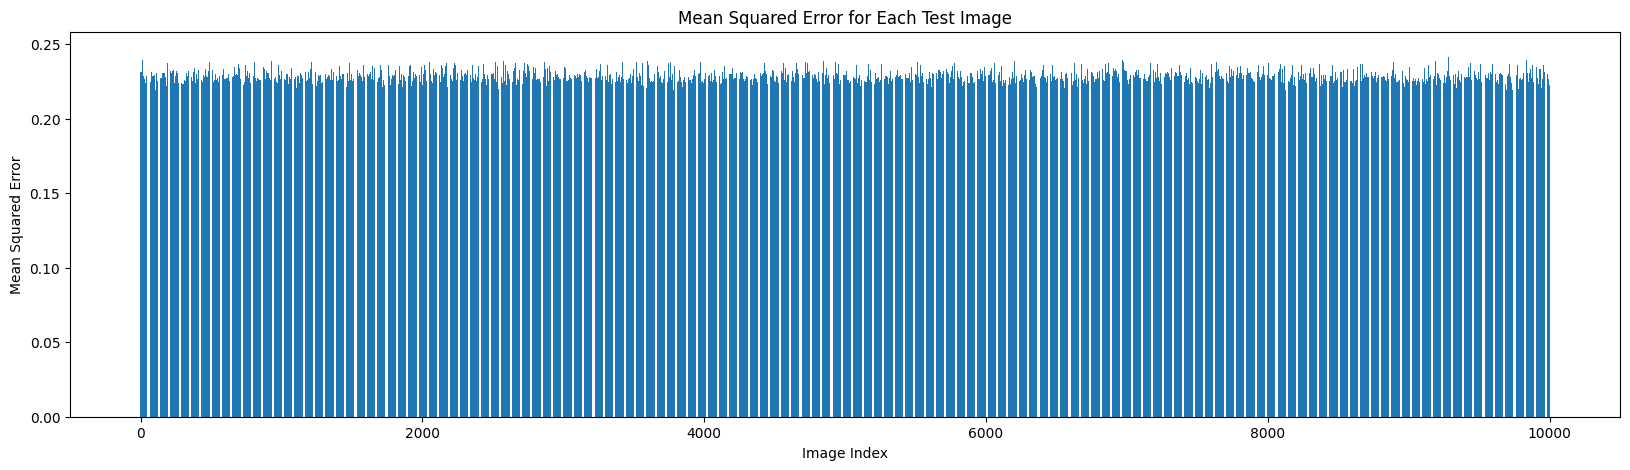

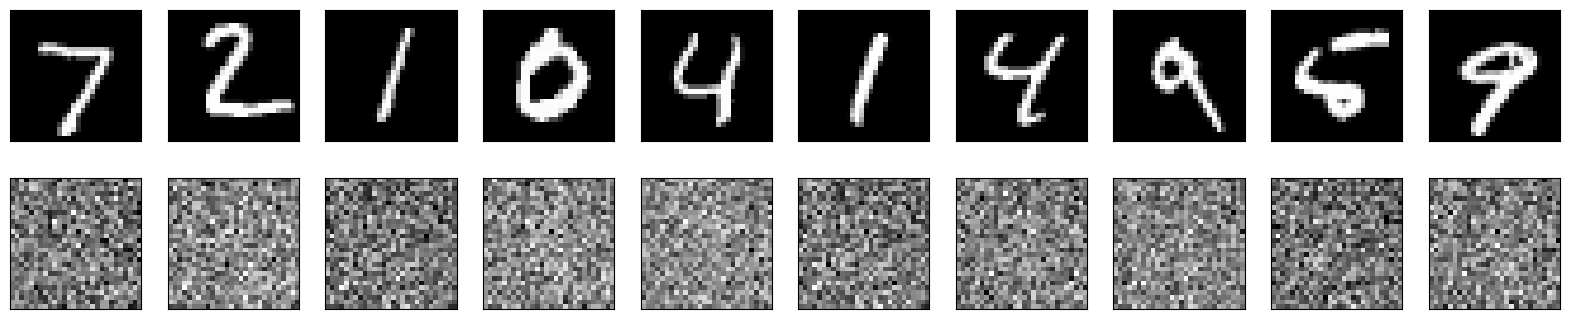

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

mse = np.mean((x_test - decoded_imgs)**2, axis=(1,))

for i, error in enumerate(mse):
    print(f"Image {i}: {error:.5f}")

plt.figure(figsize=(20, 5))
plt.bar(range(len(mse)), mse)
plt.xlabel('Image Index')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for Each Test Image')
plt.show()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
